## cgSENSE reconstruction 
###### Author: Zimu Huo
###### Date: 03.2022

### Key points

- The main ideas are from [3] where he talked about iterative methods and 
built on [1] the original paper on SENSE

- As stated by the title, this algorithm uses conjugate gradient method, 
and it is implemented using equations from 45 to 49 in [4]. 

- Note that the sum of k-space integrals are weighted by
complex conjugate coil sensitivity as stated in [3] equation 18

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Klaas P. Pruessmann et al. 
    Title: SENSE: Sensitivity Encoding for Fast MRI
    Link: https://pubmed.ncbi.nlm.nih.gov/10542355/
    
    [2] 
    Author: Klaas P. Pruessmann et al. 
    Title: 2D SENSE for faster 3D MRI*
    Link: https://doc.rero.ch/record/317765/files/10334_2007_Article_BF02668182.pdf
    
    [3] 
    Author: Klaas P. Pruessmann et al. 
    Title: Advances in Sensitivity Encoding With Arbitrary
            k-Space Trajectories
    Link: https://onlinelibrary.wiley.com/doi/pdfdirect/10.1002/mrm.1241
    
    [4] 
    Author: Jonathan Richard Shewchuk. (what an absolute legend!)
    Title: An Introduction to the Conjugate Gradient Method
          Without the Agonizing Pain Edition 1+1/4
    Link: https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf
    
    [5] 
    Author: Oliver Maier et al.
    Title: CG-SENSE revisited: Results from the first ISMRM reproducibility challenge
    Link: https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.28569

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import util.coil as coil
from util.fft import *
import numpy as np
import util.mask as undersample
from util.cgSolver import *
import util.io as io

In [2]:
data = np.load("../lib/slice1_grappa1.npy")
# estimate the sensivity maps
[ny, nx, nc] = data.shape
images = ifft2c(data) 
image = coil.rsos(images) 
sensMap = coil.cmap(images)
R = 4
mask = undersample.sense(data.shape,R)
dataR = np.zeros([ny, nx, nc], dtype=complex)
dataR = data*mask
imagesR = ifft2c(dataR)

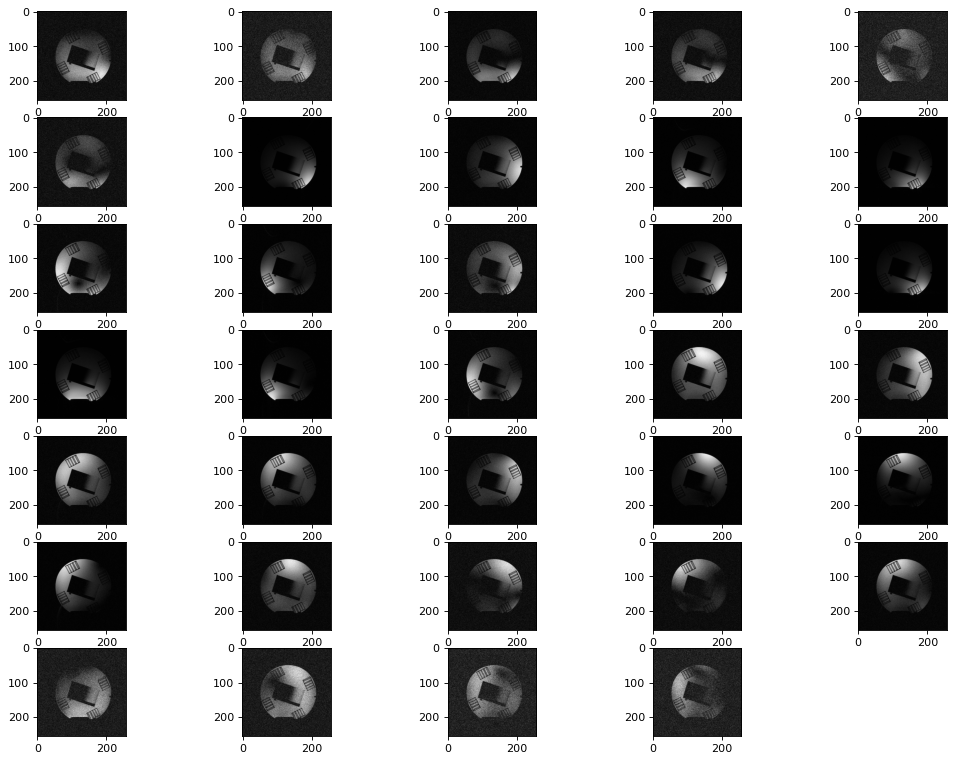

In [3]:
show(ifft2c(data))

In [5]:
recon =cg_sense(dataR, sensMap, 100)

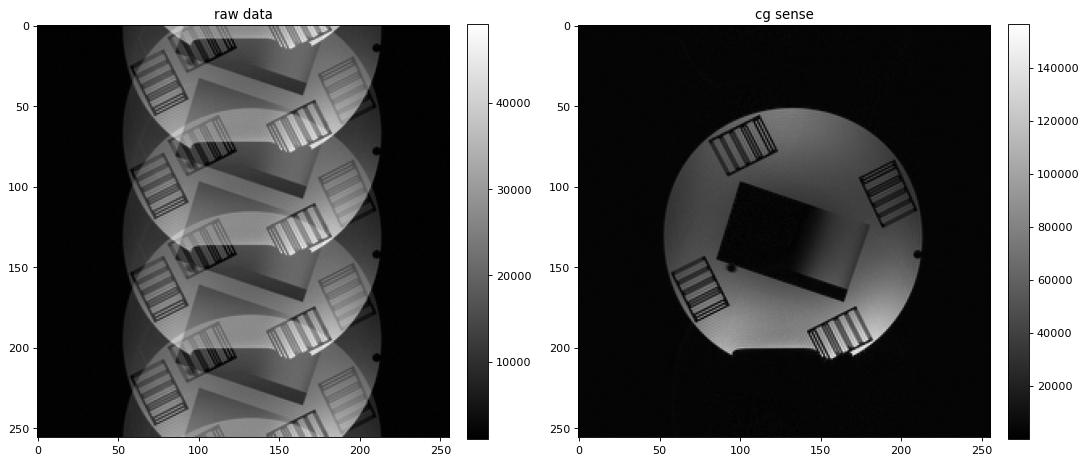

In [6]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(121)
plt.title("raw data")
tf = plt.imshow(np.abs(coil.rsos(imagesR)), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title("cg sense")
tf = plt.imshow(np.abs(recon), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()